In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<font color = 'lime'>Abrimos nuestro csv de vinos.

In [2]:
vinos = pd.read_csv('vinos.csv', index_col= 0)
vinos.sample(10)

,wine,year,rating,num_reviews,country,region,price,type,body,acidity
winery,,,,,,,,,,
Sierra Cantabria,Coleccion Privada,2012,4.2,420,Espana,Rioja,28.30,Rioja Red,4.0,3.0
Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera Del Duero Red,5.0,3.0
Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00,Rioja Red,4.0,3.0
La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.50,Rioja Red,4.0,3.0
Gonzalez-Byass,Anada Palo Cortado 1987,1987,4.7,53,Espana,Jerez Palo Cortado,400.85,Sherry,4.0,3.0
Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0
Terras Gauda,Terras Gauda O Rosal,2021,4.2,466,Espana,Rias Baixas,11.90,Albarino,3.0,3.0
Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95,NaN,NaN,NaN
Traslascuestas,Valcavado de Traslascuestas,2014,4.4,31,Espana,Ribera del Duero,35.48,Ribera Del Duero Red,5.0,3.0


In [3]:
x=vinos['num_reviews'].values.reshape(-1, 1)
y= vinos['price'].values.reshape(-1, 1)

#### 1. Realizar de nuevo el ajuste lineal con los mismos datos y parámetros utilizados en la lección anterior.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [5]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

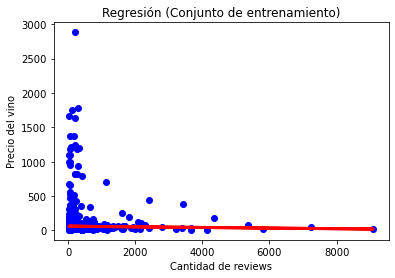

In [6]:
plt.scatter(x_test,y_test,color="blue")  
plt.plot(x_test,y_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Precio del vino')
plt.show()

#### 2.Realizar un estudio de las asunciones de linealidad para los resultados obtenidos de nuestra regresión lineal simple.

<font color = 'lime'> - LINEALIDAD

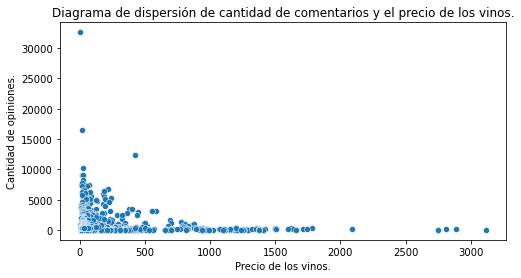

In [8]:
plt.figure(figsize =(8,4)) 
fig = sns.scatterplot(x='price' , y='num_reviews', data = vinos, ci= None) 
fig.set(xlabel='Precio de los vinos.', ylabel = 'Cantidad de opiniones.') 
fig.set_title('Diagrama de dispersión de cantidad de comentarios y el precio de los vinos.') 
plt.show();

<font color = 'lime'>Vemos que nuestros datos no siguen una linealidad.

<font color = 'lime'> - INDEPENCIA

In [9]:
residuals = (y_test - y_prediction)

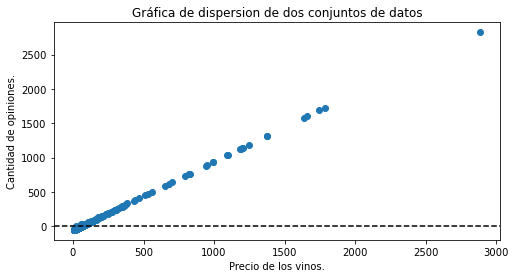

In [10]:
fig,ax = plt.subplots(figsize= (8,4)) 
plt.scatter(x=y_test , y=residuals) 
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos') 
ax.set_xlabel('Precio de los vinos.') 
ax.set_ylabel('Cantidad de opiniones.') 
plt.show();

<font color = 'lime'>Nuestros datos no son independientes porque vemos que nuestros residuos no estan entorno a y=0.

<font color = 'lime'> - HOMOCEDASTICIDAD

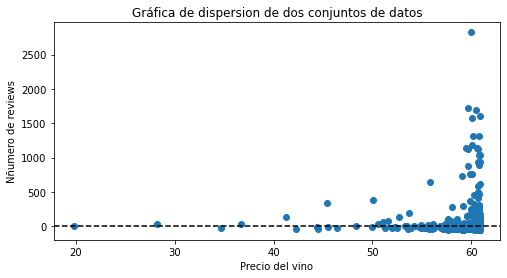

In [13]:
fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Precio del vino')
ax.set_ylabel('Nñumero de reviews')
plt.show()

<font color = 'lime'> De nuevo vemos que los valores predichos no están distibuídos uniformemente. Así que no se cumple la condición de homocedasticidad.

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


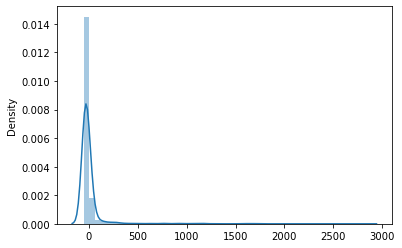

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


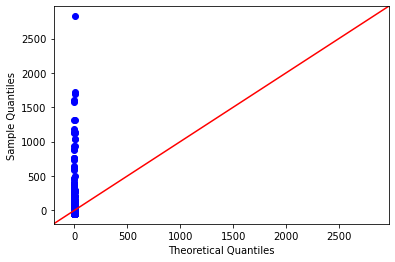

In [12]:
fig = plt.figure()
sns.distplot(residuals)
plt.show()
sm.qqplot(residuals, line = '45')
py.show();

### 3. Interpretación de los resultados. Ahora interpreta los resultados obtenidos del estudio de las asunciones de linealidad del ajuste lineal simple y explica lo mejor posible los resultados obtenidos, así como si se cumple o se incumple algunas de las asunciones de linealidad.

<font color = 'lime'> Nuestros datos no están distribuídos de forma normal al rededor de la línea central, por lo que nuestros datos no cumplen la condición de normalidad. En el displot vemos que nuestros datos se concentran entorno al valor cero, pero no se asemejan a la forma de campana de Gauss. Por lo tanto, confirmamos una vez más que no cumplen la condición de normalidad.